In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = 2* np.random.rand(100,1)
y= 4 + 3*X + np.random.randn(100,1)

In [7]:
print(X[:2])
print(y[:2])

[[0.91063614]
 [1.97804095]]
[[8.4627881 ]
 [9.88178705]]


theta = (X'X)^-1 X' y

In [14]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
print(X_b[:4])
print(theta_best[:4])

[[1.         0.91063614]
 [1.         1.97804095]
 [1.         1.11018947]
 [1.         1.40560742]]
[[3.87899437]
 [3.06462134]]


In [13]:
%whos

Variable   Type       Data/Info
-------------------------------
X          ndarray    100x1: 100 elems, type `float64`, 800 bytes
X_b        ndarray    100x2: 200 elems, type `float64`, 1600 bytes
np         module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd         module     <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
x_b        ndarray    100x2: 200 elems, type `float64`, 1600 bytes
y          ndarray    100x1: 100 elems, type `float64`, 800 bytes


In [16]:
X_new = np.array([[0],[2]])
print(X_new)

X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b)

y_predict = X_new_b.dot(theta_best)
y_predict

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


array([[ 3.87899437],
       [10.00823705]])

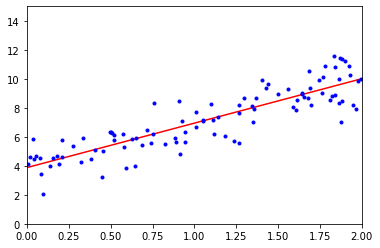

In [17]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.intercept_, lin_reg.coef_

(array([3.87899437]), array([[3.06462134]]))

In [21]:
lin_reg.predict(X_new)

array([[ 3.87899437],
       [10.00823705]])

In [22]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.87899437],
       [3.06462134]])

In [23]:
np.linalg.pinv(X_b).dot(y)

array([[3.87899437],
       [3.06462134]])

In [24]:
eta =0.1
n_iterations = 1000
m = 100

In [25]:
theta  = np.random.randn(2,1)

In [26]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta  - eta * gradients

In [27]:
theta

array([[3.87899437],
       [3.06462134]])

In [28]:
n_epochs = 50
t0, t1 = 5, 50

In [33]:
def learning_schedule(t):
    return t0 / (t+t1)

In [34]:
theta = np.random.randn(2,1)

In [35]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch *m +i)
        theta = theta -eta*gradients

In [36]:
theta

array([[3.81747594],
       [3.10377326]])

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.85595142]), array([3.02807677]))

In [40]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X+2 + np.random.randn(m,1)

In [42]:
# np.random.randn?

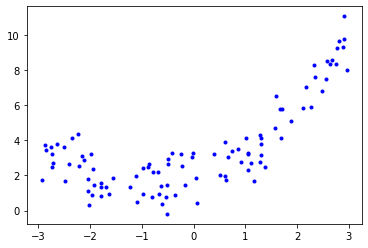

In [45]:
plt.plot(X,y, "b.")

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_features  = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.55613865])

In [47]:
X_poly[0]

array([2.55613865, 6.5338448 ])

In [48]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87628708]), array([[0.9933508 , 0.53884102]]))

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

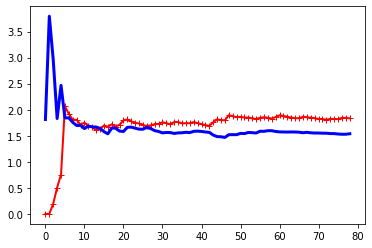

In [56]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

### 10th degree polynomial

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

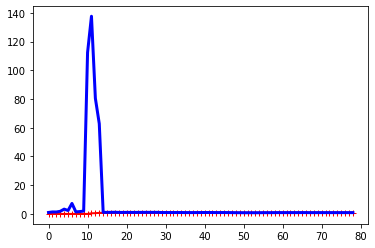

In [59]:
plot_learning_curves(polynomial_regression, X,y)

In [60]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)

ridge_reg.predict([[1.5]])

array([[5.09077427]])

In [61]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([5.076747])

In [63]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.04646868])

In [64]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.04702582])

In [68]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [70]:
# poly_scaler = Pipeline([
#     ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
#     ("std_scaler", StandardScaler()),
# ])

# X_train_poly_scaled = poly_scaler.fit_transform(X_train)
# X_val_poly_scaled = poly_scaler.transform(X_val)

In [72]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [73]:
X = iris["data"][:,3:]

In [75]:
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [76]:
y = (iris["target"] ==2).astype(np.int)

In [77]:
y[:5]

array([0, 0, 0, 0, 0])

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

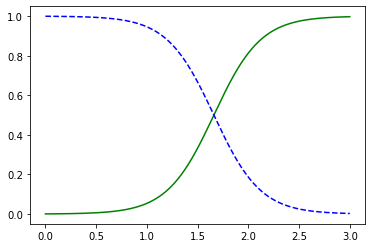

In [84]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
y_proba
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")

plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris virginica")

In [85]:
X_new[:10]

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703]])

In [86]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [87]:
X = iris["data"][:, (2,3)]
y = iris["target"]

In [88]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [89]:
softmax_reg.predict([[5,2]])

array([2])

In [92]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])